In [26]:
import numpy as np
from scipy.integrate import quad
from scipy.optimize import minimize
from PlotSettings import MainColor1, MainColor2, MainColor3, BackgroundColor1, BackgroundColor2, BackgroundColor3, Gray1, Gray2, plt

alphaDM = 0.01



############## Functions ###############
def sigmatransfer(V, mphi, mchi, alphax):
    w = 300 * (mphi / 10) * (10 / mchi)
    st = (275.73) * (alphax / 1e-2) ** 2 * (mchi / 10) * (10 / mphi) ** (4)
    sv = 2 * st * (w ** 4 / V ** 4) * (2 * np.log(1.0 + V ** 2 / (2 * w ** 2)) - np.log(1.0 + V ** 2 / (w ** 2)))
    return sv


def sigmaviscosity(V, mphi, mchi, alphax):
    w  = 300*(mphi/(10))*(10/(mchi))
    st = (275.73)*(alphax/0.01)**2*(mchi/10.0)*(10.0/(mphi))**(4)
    sv = 6*st*(w**6/(V**6))*((2+V**2/(w**2))*np.log(1+V**2/(w**2))-2*V**2/w**2)
    return sv


def Integrand_sigmatransfer(v, v0, M, m, alphax):
    return sigmatransfer(v, M, m, alphax)*v*np.exp(-0.5*v**2/v0**2)*v**2


def Integrand_sigmaviscosity(v, v0, M, m, alphax):
    return sigmaviscosity(v, M, m, alphax)*v*np.exp(-0.5*v**2/v0**2)*v**2


def Average_sigmatransfer(v0, M, m, alphax):
    sigma2_MB = v0**2*np.pi*(3*np.pi - 8)/np.pi
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 * m)
    Integral = quad(Integrand_sigmatransfer, 0., vmax, args=(v0, M, m, alphax))[0]
    return Prefactor*Integral

def Average_sigmaviscosity(v0, M, m, alphax):
    sigma2_MB = v0**2*np.pi*(3*np.pi - 8)/np.pi
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 * m)
    Integral = quad(Integrand_sigmaviscosity, 0., vmax, args=(v0, M, m, alphax))[0]
    return Prefactor*Integral


############## Camila Data ###############

CamilaData_Fig7 = np.loadtxt('Data-Sets/Data_Fig7_Correa_2021.txt')
VelocityData = CamilaData_Fig7[:,0]
Velocity_16_Percentile = CamilaData_Fig7[:,1]
Velocity_84_Percentile = CamilaData_Fig7[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig7[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig7[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig7[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


############## Complete Data ###############

CompleteData = np.loadtxt('Data-Sets/FullData.csv')
x_data = CompleteData[:,0]
y_data = CompleteData[:,1]
err_x_data = CompleteData[:,2]
err_y_data = CompleteData[:,3]

############# Define a chi square ###########
def compute_chi2(free_params, alphax, x=x_data, data=y_data, err=(err_x_data, err_y_data)):
    #Compute model
    M, m = free_params
    model = [Average_sigmatransfer(x, M, m, alphax) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x

########## Compute the fit #############
def compute_fit(alphax):
    M_ini, m_ini = 50, 6
    initial = [M_ini, m_ini]
    soln = minimize(compute_chi2, initial, args=(alphax, x_data, y_data, (err_x_data, err_y_data)), method='Nelder-mead')

    M_bf, m_bf = soln.x
    print("alpha_X = ", alphax)

    print("Best Fit Parameters")
    print('M = {0:.2f} MeV'.format(M_bf))
    print('m = {0:.2f} GeV'.format(m_bf))
    print("Chi-squared:", compute_chi2((M_bf, m_bf), alphax))

compute_fit(0.005)
compute_fit(0.007)
compute_fit(0.03)

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_17900\1048247539.py:38: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmatransfer, 0., vmax, args=(v0, M, m, alphax))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_17900\1048247539.py:38: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Integral = quad(Integrand_sigmatransfer, 0., vmax, args=(v0, M, m, alphax))[0]


alpha_X =  0.005
Best Fit Parameters
M = 9.79 MeV
m = 6.87 GeV
Chi-squared: 503321.54066271515
alpha_X =  0.007
Best Fit Parameters
M = 11.58 MeV
m = 8.13 GeV
Chi-squared: 503321.5406686095
alpha_X =  0.03
Best Fit Parameters
M = 23.98 MeV
m = 16.84 GeV
Chi-squared: 503321.54066235


C:\Users\Nicolás\AppData\Local\Temp\ipykernel_17900\1048247539.py:38: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Integral = quad(Integrand_sigmatransfer, 0., vmax, args=(v0, M, m, alphax))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_17900\1048247539.py:38: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_sigmatransfer, 0., vmax, args=(v0, M, m, alphax))[0]


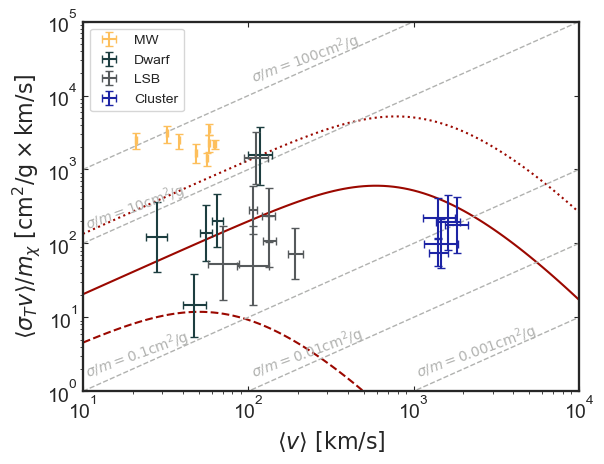

In [54]:
"""
//////////// Plots ////////////
"""

#for the plots
DwarfData = np.loadtxt('Data-Sets/DwarfDataPlot.csv', delimiter='\t')
Dwarf_x =     DwarfData[:,0]
Dwarf_y =     DwarfData[:,1]
Dwarf_Err_l = DwarfData[:,2]
Dwarf_Err_r = DwarfData[:,3]
Dwarf_Err_d = DwarfData[:,4]
Dwarf_Err_u = DwarfData[:,5]

GalaxyData = np.loadtxt('Data-Sets/GalaxyDataPlot.csv', delimiter='\t')
Galaxy_x = GalaxyData[:,0]
Galaxy_y = GalaxyData[:,1]
Galaxy_Err_l = GalaxyData[:,2]
Galaxy_Err_r = GalaxyData[:,3]
Galaxy_Err_d = GalaxyData[:,4]
Galaxy_Err_u = GalaxyData[:,5]

ClusterData = np.loadtxt('Data-Sets/ClusterDataPlot.csv', delimiter='\t')
Cluster_x = ClusterData[:,0]
Cluster_y = ClusterData[:,1]
Cluster_Err_l = ClusterData[:,2]
Cluster_Err_r = ClusterData[:,3]
Cluster_Err_d = ClusterData[:,4]
Cluster_Err_u = ClusterData[:,5]

v_array = np.logspace(1, 4, 100)
v0 = v_array*np.sqrt(np.pi)/4

sigvm_array = np.zeros(100)
sigvm_array2 = np.zeros(100)
sigvm_array3 = np.zeros(100)

alphaDM, alphaDM2, alphaDM3 = 0.005, 0.01, 0.03
mZp, mZp2, mZp3 = 9.8, 20, 15
mDM, mDM2, mDM3 = 6.9, 165, 8

for i in range(100):
    sigvm_array[i] = Average_sigmatransfer(v0[i], mZp, mDM, alphaDM)
    sigvm_array2[i] = Average_sigmatransfer(v0[i], mZp2, mDM2, alphaDM2)
    sigvm_array3[i] = Average_sigmatransfer(v0[i], mZp3, mDM3, alphaDM3)
    
# Plot Best Fit

#Model Plot
plt.plot(v_array, sigvm_array, color=MainColor1)
plt.plot(v_array, sigvm_array2, color=MainColor1, linestyle='dashed')
plt.plot(v_array, sigvm_array3, color=MainColor1, linestyle='dotted')

rot = 20
#Cross section diagonals
DiagonalsColor = Gray2
Diagonalswidth = 1
plt.plot(v_array, 0.001*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
plt.text(1000, 1.5, r'$ \sigma/m = 0.001 \mathrm{cm^2/g}$', size=10, rotation= rot, color=DiagonalsColor)
plt.plot(v_array, 0.01*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
plt.text(100, 1.5, r'$ \sigma/m = 0.01 \mathrm{cm^2/g}$', size=10, rotation= rot,color=DiagonalsColor)
plt.plot(v_array, 0.1*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
plt.text(10, 1.5, r'$ \sigma/m = 0.1 \mathrm{cm^2/g}$', size=10, rotation= rot, color=DiagonalsColor)
plt.plot(v_array, 10*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
plt.text(10, 150, r'$ \sigma/m = 10 \mathrm{cm^2/g}$', size=10, rotation= rot, color=DiagonalsColor)
plt.plot(v_array, 100*v_array, color=DiagonalsColor, linestyle='dashed', lw=Diagonalswidth)
plt.text(100, 1.5e4, r'$ \sigma/m = 100 \mathrm{cm^2/g}$', size=10, rotation= rot, color=DiagonalsColor)

#Data
plt.errorbar(VelocityData, CrossSectionData, CrossSectionData_Err , VelocityData_Err , ls='', color=BackgroundColor3, capsize=3, label='MW')
plt.errorbar(Dwarf_x, Dwarf_y, (Dwarf_Err_d, Dwarf_Err_u), (Dwarf_Err_l, Dwarf_Err_r), ls='', color=BackgroundColor2, capsize=3, label='Dwarf')
plt.errorbar(Galaxy_x, Galaxy_y, (Galaxy_Err_d, Galaxy_Err_u), (Galaxy_Err_l, Galaxy_Err_r), ls='', color=Gray1, capsize=3, label='LSB')
plt.errorbar(Cluster_x, Cluster_y, (Cluster_Err_d, Cluster_Err_u), (Cluster_Err_l, Cluster_Err_r), ls='', color=MainColor2, capsize=3, label='Cluster')

#Settings
plt.tick_params(top=True, right=True, direction='in')
plt.xlabel(r'$\langle v \rangle ~[ \mathrm{km/s}]$')
plt.ylabel(r'$\langle\sigma_T v \rangle /m_{\chi} ~[\mathrm{cm^2/g \times km/s}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, 1e5)
plt.xlim(10, 1e4)
plt.legend(loc=2)
plt.savefig('Plots/GalaxyFit.pdf')
plt.savefig('Plots/GalaxyFit.svg')
plt.show()